<a href="https://colab.research.google.com/github/songwoojin04/machine2/blob/main/10week/1D_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    loaded = np.dstack(loaded)
    return loaded

def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    filenames = list()
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    X = load_group(filenames, filepath)
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [13]:
def load_dataset(prefix=''):
    trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/Colab Notebooks/10주차/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/')
    testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/Colab Notebooks/10주차/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/')

    trainy = trainy - 1
    testy = testy - 1
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

In [14]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()
from sklearn.model_selection import train_test_split

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.2,random_state=100)

X_train.shape,X_val.shape,y_train_one_hot.shape,y_val_one_hot.shape,y_train.shape,y_val.shape

/tmp/ipython-input-3497204177.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3497204177.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3497204177.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3497204177.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


/tmp/ipython-input-3497204177.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


((5881, 128, 9), (1471, 128, 9), (5881, 6), (1471, 6), (5881, 1), (1471, 1))

In [15]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_one_hot.shape[1]

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GRU, Dropout

inputs = Input(shape=(n_timesteps, n_features))
x = GRU(128, return_sequences=True)(inputs)
x = Dropout(0.3)(x)
x = GRU(64)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(n_outputs, activation='softmax')(x)

gru_model = Model(inputs, outputs)
gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_history = gru_model.fit(X_train, y_train_one_hot, epochs=30, batch_size=32, validation_split=0.1)

Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4478 - loss: 1.3145 - val_accuracy: 0.7250 - val_loss: 0.7017
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7256 - loss: 0.6403 - val_accuracy: 0.9151 - val_loss: 0.2503
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9100 - loss: 0.2517 - val_accuracy: 0.9406 - val_loss: 0.1390
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9324 - loss: 0.1770 - val_accuracy: 0.9457 - val_loss: 0.1142
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9436 - loss: 0.1455 - val_accuracy: 0.9508 - val_loss: 0.1174
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9474 - loss: 0.1390 - val_accuracy: 0.9626 - val_loss: 0.1222
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9498 - loss: 0.1307 - val_accuracy: 0.9474 - val_loss: 0.1160
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9438 - loss: 0.1436 - val_accu

13/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step   

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_7
Received: inputs=('Tensor(shape=(32, 128, 9))',)
  warnings.warn(msg)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_7
Received: inputs=('Tensor(shape=(None, 128, 9))',)
  warnings.warn(msg)


[[471  14  11   0   0   0]
 [ 11 444  16   0   0   0]
 [  0   1 419   0   0   0]
 [  0  20   0 374  91   6]
 [  2   3   0  52 475   0]
 [  0  25   0   0   0 512]]
0.9144893111638955
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       496
           1       0.88      0.94      0.91       471
           2       0.94      1.00      0.97       420
           3       0.88      0.76      0.82       491
           4       0.84      0.89      0.87       532
           5       0.99      0.95      0.97       537

    accuracy                           0.91      2947
   macro avg       0.92      0.92      0.91      2947
weighted avg       0.92      0.91      0.91      2947



<Axes: >

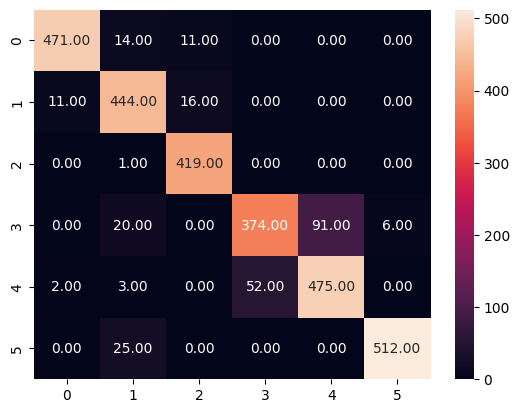

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred=gru_model.predict([testX])
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')